## 4. Numerical solution of the Bloch equations 

Part a):

In [1]:

import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time


gamma = 1
gamma_phi = 0
gamma_orth = gamma/2 + gamma_phi

delta = 0
Omega = 10


Omega_values = [5 * gamma, 0.2 * gamma]
titles = [r"$\Omega/\Gamma = 5$", r"$\Omega/\Gamma = 0.2$"]


M = np.array([[-gamma_orth, delta, 0],[-delta, -gamma_orth, -Omega],[0, Omega, -gamma]]) #from the lecture slides
M_inv = np.linalg.inv(M)

S_0 = np.array([0,0,-1])

In [2]:
def ddt_S(t, S, M, gamma):
    return M @ S - np.array([0,0,gamma])

<>:25: SyntaxWarning: invalid escape sequence '\O'
<>:25: SyntaxWarning: invalid escape sequence '\O'
C:\Users\tilln\AppData\Local\Temp\ipykernel_19500\3135816591.py:25: SyntaxWarning: invalid escape sequence '\O'
  plt.suptitle("Bloch Sphere Components for Different $\Omega / \Gamma$")


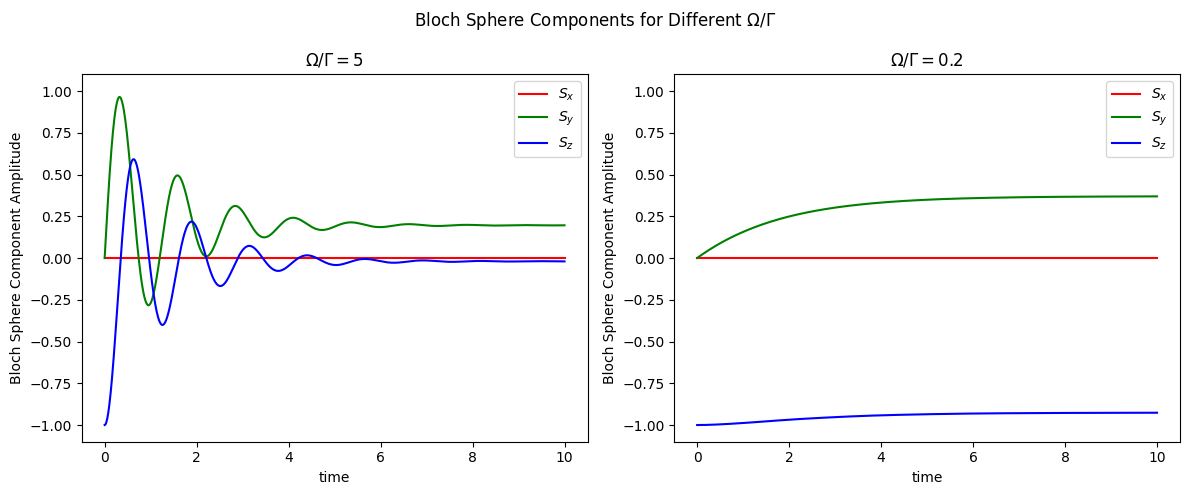

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

tsteps = 1000
t_span = np.linspace(0, 10, tsteps)

for i, Omega in enumerate(Omega_values):
    M = np.array([
        [-gamma_orth, delta, 0],
        [-delta, -gamma_orth, -Omega],
        [0, Omega, -gamma]
    ])
    
    sol = solve_ivp(ddt_S, (t_span[0], t_span[-1]), S_0, t_eval=t_span, args=[M, gamma])
    S_t = sol.y
    
    axes[i].plot(t_span, S_t[0], label=r"$S_x$", color="r")
    axes[i].plot(t_span, S_t[1], label=r"$S_y$", color="g")
    axes[i].plot(t_span, S_t[2], label=r"$S_z$", color="b")
    axes[i].set_xlabel("time")
    axes[i].set_ylabel("Bloch Sphere Component Amplitude")
    axes[i].set_ylim(-1.1, 1.1)
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.suptitle("Bloch Sphere Components for Different $\Omega / \Gamma$")
plt.tight_layout()
plt.show()



We can see the expected behaviour. For little driving, we expect the state to stay in the ground state $\ket{g}$. For high driving we expect the state to converge to the maximally mixed state.

Part b)

Evaluate S_lim:

In [4]:
S_inf= M_inv @ np.array([0, 0, gamma])
print("Steady state S_inf = ", S_inf)

Steady state S_inf =  [ 0.          0.09950249 -0.00497512]



For large $\frac{\Omega}{\Gamma}$ the values all converge against zero. 


In [5]:
gamma = 1
gamma_phi = 0
gamma_orth = gamma/2 + gamma_phi

delta = 0
Omega = 10


step_number = 4

Omega_values_b = [0.2*gamma,1*gamma,5*gamma]
#titles = [r"$\Omega/\Gamma = i$" for i in range(1, step_number+1)]

#M = np.array([[-gamma_orth, delta, 0],[-delta, -gamma_orth, -Omega],[0, Omega, -gamma]]) #from the lecture slides

S_0 = np.array([0,0,-1])

In [6]:
def ddt_S(t, S, M, gamma):
    return M @ S - np.array([0,0,gamma])

<>:14: SyntaxWarning: invalid escape sequence '\O'
<>:14: SyntaxWarning: invalid escape sequence '\O'
C:\Users\tilln\AppData\Local\Temp\ipykernel_19500\2999275316.py:14: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Excited State Population for Different $\Omega / \Gamma$")


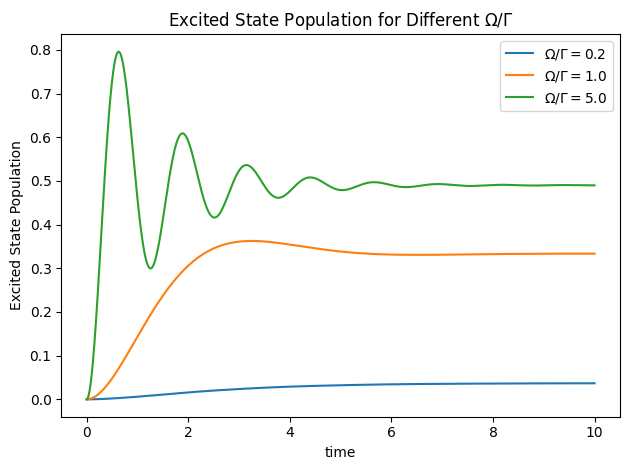

In [13]:


for i, Omega in enumerate(Omega_values_b):
    M = np.array([
        [-gamma_orth, delta, 0],
        [-delta, -gamma_orth, -Omega],
        [0, Omega, -gamma]
    ])
    
    sol = solve_ivp(ddt_S, (t_span[0], t_span[-1]), S_0, t_eval=t_span, args=[M, gamma])
    S_t = sol.y

    rho_exited = (1+S_t[2])/2
    plt.plot(t_span, rho_exited, label= r"$\Omega/\Gamma = " + str(Omega/gamma) + "$")

plt.title("Excited State Population for Different $\Omega / \Gamma$")
plt.xlabel("time")
plt.ylabel("Excited State Population")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# The code simulates the dynamics of a two-level quantum system (qubit) under the influence of a time-independent Hamiltonian.